This notebook is based on the following article: https://arxiv.org/abs/2305.10990

In this notebook, we will calculate D based on equations 2 and 3


In [1]:
import pandas as pd
import numpy as np
from scipy.linalg import solve
from scipy.stats import linregress
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.special import factorial

In [2]:
#df = pd.read_csv('QUOTAS_3only.csv')
df = pd.read_csv('./data/df_bins_2.5.csv')
df = df[(df != 0).all(axis=1) & df.notna().all(axis=1)]
redshifts = df['z'].values
luminosity = df['log_lbol'].values
masses = df['log_bh'].values

# Filter data where redshift is between 3 and 4.8
df_filtered = df[(df['z'] >= 3) & (df['z'] <= 5.5)]

# Extract values
redshifts = df_filtered['z'].values
luminosity = df_filtered['log_lbol'].values
masses = df_filtered['log_bh'].values

#data = luminosity
data = masses
print(len(data))

12352


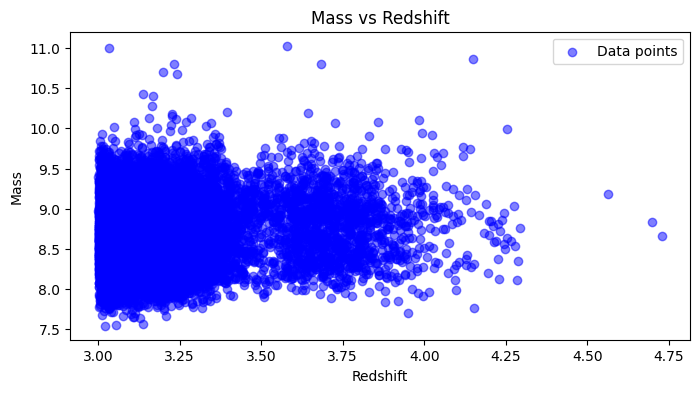

Min mass value: 7.544
Max mass value: 11.028
Min redshift value: 3.0002999305725098
Max redshift value: 4.729300022125244


In [3]:
plt.figure(figsize=(8, 4))
plt.scatter(redshifts, masses, color='blue', alpha=0.5, label='Data points')
plt.xlabel('Redshift')
plt.ylabel('Mass')
plt.title('Mass vs Redshift')
plt.legend()
plt.show()

# Printing the results
print(f"Min mass value: {np.min(masses)}")
print(f"Max mass value: {np.max(masses)}")
print(f"Min redshift value: {np.min(redshifts)}")
print(f"Max redshift value: {np.max(redshifts)}")

# BINs

In [4]:
min_value = np.min(data)
max_value = np.max(data)

num_bins = 8
bins = np.linspace(min_value, max_value, num_bins)

digitized = np.digitize(data, bins)

binned_data = [data[digitized == i] for i in range(1, len(bins))]

# Printing the results
#print(f"Data length: {len(data)}")
#print(f"Redshifts length: {len(redshifts)}")
print(f"Min value: {min_value}")
print(f"Max value: {max_value}")
#print(f"Bins: {bins}")
for i, bin_data in enumerate(binned_data):
    print(f"Bin {i+1} ({bins[i]} to {bins[i+1]}): {bin_data}")
print(f"Len bin: {len(binned_data)}")
for i in range(len(binned_data)):
    print(f"Len Bin {i} : {len(binned_data[i])}")
len(binned_data[0])

Min value: 7.544
Max value: 11.028
Bin 1 (7.544 to 8.041714285714285): [7.97401519 7.85752693 7.6620347  7.89428792 7.94272895 8.03834593
 8.0277532  7.93817063 7.98599907 7.78969881 7.93482129 7.81559192
 7.99853084 7.99532467 7.96429249 7.92985983 7.785      8.022
 7.757      7.905      7.937      7.983      7.89       7.802
 7.923      7.916      7.925      7.842      7.942      7.994
 7.859      7.932      7.934      8.005      7.879      7.965
 7.964      7.877      7.908      7.717      7.881      8.027
 7.813      7.885      7.851      7.544      7.831      7.705
 7.856      7.882      8.01       7.863      7.876      8.012
 7.973      7.997      7.905      7.897      7.741      7.907
 7.901      8.013      7.964      7.892      7.877      8.007
 7.9        7.856      8.012      7.909      8.041      7.821
 7.92       8.03       7.935      8.031      7.971      8.012
 7.899      8.037      7.57       8.024      7.877      7.808
 7.76       7.738      7.71       8.02       7.894 

449

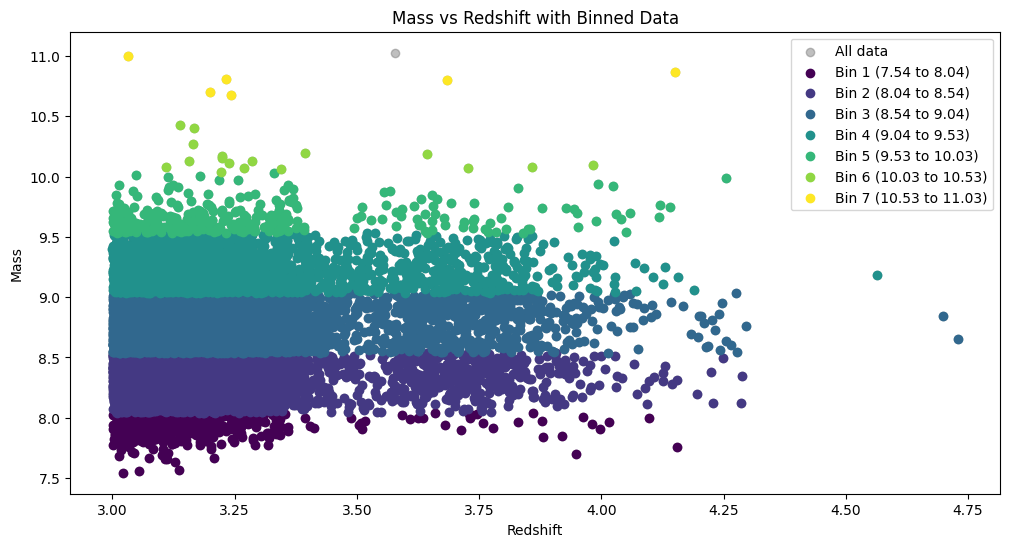

Min value: 7.544
Max value: 11.028
Bin 1 (7.544 to 8.041714285714285): [7.97401519 7.85752693 7.6620347  7.89428792 7.94272895 8.03834593
 8.0277532  7.93817063 7.98599907 7.78969881 7.93482129 7.81559192
 7.99853084 7.99532467 7.96429249 7.92985983 7.785      8.022
 7.757      7.905      7.937      7.983      7.89       7.802
 7.923      7.916      7.925      7.842      7.942      7.994
 7.859      7.932      7.934      8.005      7.879      7.965
 7.964      7.877      7.908      7.717      7.881      8.027
 7.813      7.885      7.851      7.544      7.831      7.705
 7.856      7.882      8.01       7.863      7.876      8.012
 7.973      7.997      7.905      7.897      7.741      7.907
 7.901      8.013      7.964      7.892      7.877      8.007
 7.9        7.856      8.012      7.909      8.041      7.821
 7.92       8.03       7.935      8.031      7.971      8.012
 7.899      8.037      7.57       8.024      7.877      7.808
 7.76       7.738      7.71       8.02       7.894 

In [5]:
# Step 5: Extracting data in each bin
binned_redshifts = [redshifts[digitized == i] for i in range(1, len(bins))]

# Plotting the data
plt.figure(figsize=(12, 6))

# Plotting all data points with small markers
plt.scatter(redshifts, masses, color='gray', alpha=0.5, label='All data')

# Plotting binned data with larger markers and different colors
colors = plt.cm.viridis(np.linspace(0, 1, num_bins-1))
for i in range(num_bins-1):
    plt.scatter(binned_redshifts[i], binned_data[i], color=colors[i], label=f'Bin {i+1} ({bins[i]:.2f} to {bins[i+1]:.2f})')

plt.xlabel('Redshift')
plt.ylabel('Mass')
plt.title('Mass vs Redshift with Binned Data')
plt.legend()
plt.show()

# Printing the results
print(f"Min value: {min_value}")
print(f"Max value: {max_value}")
for i, bin_data in enumerate(binned_data):
    print(f"Bin {i+1} ({bins[i]} to {bins[i+1]}): {bin_data}")
print(f"Len bin: {len(binned_data)}")
for i in range(len(binned_data)):
    print(f"Len Bin {i+1} : {len(binned_data[i])}")



$$ K^{(l)}(x,t,\tau) = \big{<} {{[x(t+\tau)-x(t)]}^l \big{|}_{x(t)=x} \big{>} }
$$ 

$$ D^{(l)} (x.t) = {1 \over {l!}}{ {K^{(l)}(x,t,\tau)} \over {\tau}}$$

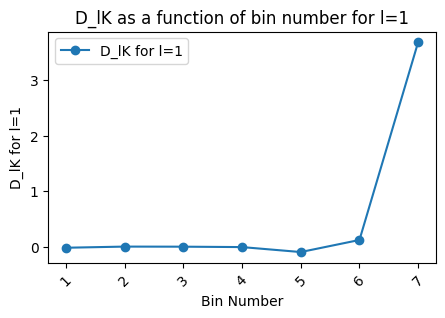

[-0.01585160486436223, 0.004748855362382289, 0.0031739487730430087, -0.004089405085801185, -0.09320831406652251, 0.1237777276464902, 3.6800000000000206]
7


In [6]:
#################### Define K_l and D_lK functions            Calculation of all values of D and NANs
def K_l(x, l):
    return np.mean(np.diff(x) ** l)

def D_lK(K_l_value, l):
    delta_t = 0.01
    return K_l_value / (delta_t*factorial(l))

l_value = 1 # Example value for l

# Calculate K_l and D_lK for each bin
K_l_values = []
D_lK_values = []

for bin_data in binned_data:
    if len(bin_data) > 1:
        K_l_val = K_l(bin_data, l_value)
        D_lK_val = D_lK(K_l_val, l_value)
        K_l_values.append(K_l_val)
        D_lK_values.append(D_lK_val)
    else:
        ###### If bin_data has less than 2 elements, K_l and D_lK can't be calculated
        K_l_values.append(np.nan)
        D_lK_values.append(np.nan)

# Plotting D_lK as a function of bins
plt.figure(figsize=(5, 3))
plt.plot(range(1, num_bins), D_lK_values, 'o-', label=f'D_lK for l={l_value}')
plt.xlabel('Bin Number')
plt.ylabel(f'D_lK for l={l_value}')
plt.title(f'D_lK as a function of bin number for l={l_value}')
plt.xticks(ticks=range(1, len(D_lK_values) + 1), rotation=45)
plt.legend()
plt.show()

print(D_lK_values)
print(len(D_lK_values))

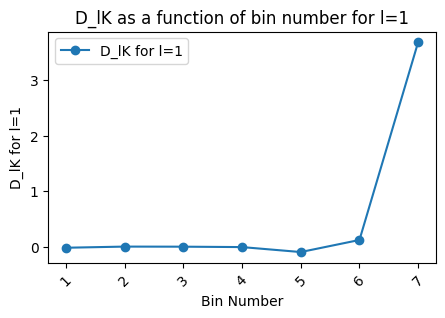

[-0.01585160486436223, 0.004748855362382289, 0.0031739487730430087, -0.004089405085801185, -0.09320831406652251, 0.1237777276464902, 3.6800000000000206]
7


In [7]:
###########################################   Calculation of all values of D without nans
def D_lK(K_l_value, l):
    delta_t = 0.01
    return K_l_value / (delta_t*factorial(l))

l_value = 1 # Example value for l

# Calculate K_l and D_lK for each bin
K_l_values = []
D_lK_values = []
valid_bins = []

for i, bin_data in enumerate(binned_data):
    if len(bin_data) > 1:
        K_l_val = K_l(bin_data, l_value)
        D_lK_val = D_lK(K_l_val, l_value)
        K_l_values.append(K_l_val)
        D_lK_values.append(D_lK_val)
        valid_bins.append(i+1)
    else:
        # Skip bins with less than 2 elements
        continue

# Plotting D_lK as a function of bins
plt.figure(figsize=(5, 3))
plt.plot(valid_bins, D_lK_values, 'o-', label=f'D_lK for l={l_value}')
plt.xlabel('Bin Number')
plt.ylabel(f'D_lK for l={l_value}')
plt.title(f'D_lK as a function of bin number for l={l_value}')
plt.xticks(ticks=valid_bins, rotation=45)
plt.legend()
plt.show()

print(D_lK_values)
print(len(D_lK_values))

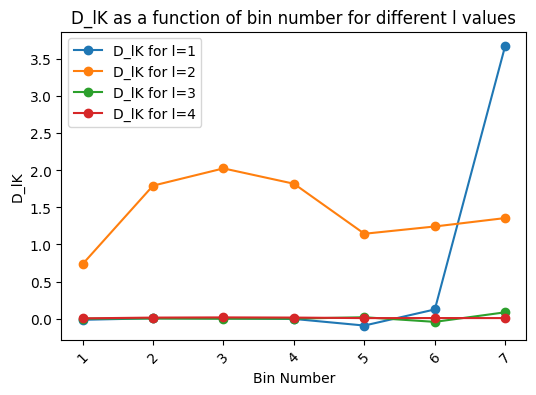

[0.003605851985081724, 0.013811592002717228, 0.01643648862710225, 0.014146442327222581, 0.007121287300820024, 0.007819849317143787, 0.007436052615000003]


In [9]:
l_values = [1, 2, 3, 4]

# Dictionary to store D_lK values for each l
all_D_lK_values = {l: [] for l in l_values}
valid_bins = []

# Calculate K_l and D_lK for each bin and each l value
for i, bin_data in enumerate(binned_data):
    if len(bin_data) > 1:
        valid_bins.append(i+1)
        for l_value in l_values:
            K_l_val = K_l(bin_data, l_value)
            D_lK_val = D_lK(K_l_val, l_value)
            all_D_lK_values[l_value].append(D_lK_val)
    else:
        for l_value in l_values:
            all_D_lK_values[l_value].append(np.nan)  # Append NaN for bins with less than 2 elements

# Plotting D_lK as a function of bins for each l value
plt.figure(figsize=(6, 4))
for l_value in l_values:
    plt.plot(valid_bins, all_D_lK_values[l_value], 'o-', label=f'D_lK for l={l_value}')
plt.xlabel('Bin Number')
plt.ylabel('D_lK')
plt.title('D_lK as a function of bin number for different l values')
plt.xticks(ticks=valid_bins, rotation=45)
plt.legend()
plt.show()
print(all_D_lK_values[4])

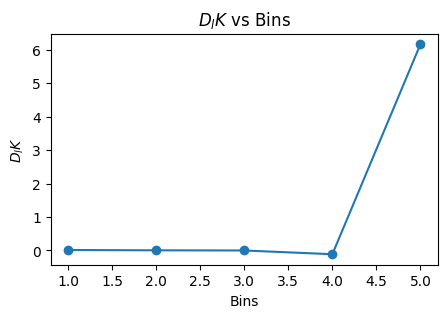

In [9]:
############################ Simpler function ###################################
def D_lK(data, l):
    delta_t = 0.01
    return K_l(data, l) / (delta_t*factorial(l))
    
# Calculate D_lK for each bin
D_lK_values = [D_lK(bin_data, l=1) for bin_data in binned_data]
#D_lK_values = [D_lK(bin_data, l=2) for bin_data in binned_values]

# Plot the D_lK graph
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(bins)), D_lK_values, marker='o')
plt.xlabel('Bins')
plt.ylabel('$D_{l}K$')
plt.title('$D_{l}K$ vs Bins')
plt.show()